In [2]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
filename <- "/gpfs/home/meyin/published_data/parabiosis/pb_combined.rds?download=1"
data <- readRDS(filename)

In [4]:
data = UpdateSeuratObject(object = data)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘harmony’

Updating matrix keys for DimReduc ‘umap_har’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Assay SCT changing from Assay to Assay”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc harmony changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap_har changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in SCT

Updating slots in pca

Updating slots in harmony

Updating slots in umap_har

Setting umap_har DimReduc to global

Setting assay used for SCTransform.RNA to RNA

Setting assay used for RunPCA.SCT to SCT

Setting assay used for Seurat::ProjectDim.SCT.harmony to SCT

Setting assay used for FindNeighbors

In [5]:
# Takes in a sparse matrix row for a specific gene from the aged group
#    and a pre-calculated average for the young reference group
calculateTransDrift <- function(geneAged, geneYoungRefAvg){
    geneAgedAvg <- mean(geneAged)
    
    foldCh <- geneAgedAvg/geneYoungRefAvg  

}

In [6]:
head(data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,Experiment,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
20_AAACCCATCGGTAGGA-1_1,GEX1,5461,2259,3.918696,3,3,3,3,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGAACAACCAACT-1_1,GEX1,7542,2698,4.627420,1,7,4,4,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,2020,NA,NA,NA,NA,5,5,5,4,7
20_AAACGAACAGGTTCAT-1_1,GEX1,15424,3461,3.060166,0,8,7,8,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,0,7,0,0,8
20_AAACGAACATGGAACG-1_1,GEX1,11212,3462,4.584374,5,6,4,6,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,2020,NA,NA,NA,NA,7,8,7,4,6
20_AAACGAAGTTGCGGCT-1_1,GEX1,10125,3303,3.348148,4,9,5,5,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,2020,NA,NA,NA,NA,8,10,8,7,9
20_AAACGAATCGTTCATT-1_1,GEX1,7902,2773,3.809162,3,3,3,3,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGCTAGCCTAACT-1_1,GEX1,4324,1829,3.075856,3,3,3,3,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGCTAGCGACCCT-1_1,GEX1,13439,3710,5.305454,1,6,4,4,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT,⋯,2020,NA,NA,NA,NA,7,8,7,4,6
20_AAACGCTAGGTAGTCG-1_1,GEX1,8253,2821,4.640737,1,7,1,4,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,2020,NA,NA,NA,NA,5,5,5,4,7


In [7]:
data <- subset(data, subset = Celltype != "Doublet")

In [8]:
data@meta.data <- data@meta.data %>%
  mutate(AgeCond = paste0(substr(Age, 1, 1), "_", Type))

In [9]:
data@meta.data <- data@meta.data %>%
  mutate(ID = sub("-.*", "", hash.ID))

In [10]:
# Split off Old Control data
oisodata <- subset(data, subset = AgeCond == "O_Iso")
head(oisodata)

# Split off Old Exercise data
ohetdata <- subset(data, subset = AgeCond == "O_Het")
head(ohetdata)

# Split off Young Control data
yisodata <- subset(data, subset = AgeCond == "Y_Iso")
head(yisodata)

# Split off Young Exercise data
yhetdata <- subset(data, subset = AgeCond == "Y_Het")
head(yhetdata)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53,ID
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
20_AAACGAACAACCAACT-1_1,GEX1,7542,2698,4.627420,1,7,4,4,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,NA,NA,NA,NA,5,5,5,4,7,BC3
20_AAACGAACAGGTTCAT-1_1,GEX1,15424,3461,3.060166,0,8,7,8,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,0,7,0,0,8,BC4
20_AAACGAACATGGAACG-1_1,GEX1,11212,3462,4.584374,5,6,4,6,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,NA,NA,NA,NA,7,8,7,4,6,BC3
20_AAACGAAGTTGCGGCT-1_1,GEX1,10125,3303,3.348148,4,9,5,5,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,NA,NA,NA,NA,8,10,8,7,9,BC6
20_AAACGCTAGCCTAACT-1_1,GEX1,4324,1829,3.075856,3,3,3,3,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,1,2,1,1,3,BC3
20_AAACGCTAGCGACCCT-1_1,GEX1,13439,3710,5.305454,1,6,4,4,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT,⋯,NA,NA,NA,NA,7,8,7,4,6,BC4
20_AAACGCTAGGTAGTCG-1_1,GEX1,8253,2821,4.640737,1,7,1,4,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,NA,NA,NA,NA,5,5,5,4,7,BC4
20_AAAGAACGTATGACAA-1_1,GEX1,7194,2569,9.104810,1,0,1,4,BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,NA,NA,NA,NA,2,0,2,2,0,BC5
20_AAAGAACGTCAATCTG-1_1,GEX1,8530,2835,1.488863,0,1,0,0,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,0,1,0,0,1,BC3


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53,ID
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
20_AAACGAATCGTTCATT-1_1,GEX1,7902,2773,3.809162,3,3,3,3,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,1,2,1,1,3,BC1
20_AAAGAACCACTGGATT-1_1,GEX1,7086,2607,4.106689,3,3,3,3,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,1,2,1,1,3,BC1
20_AAAGAACCATACTGAC-1_1,GEX1,6149,2400,7.188161,1,4,1,1,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT,⋯,NA,NA,NA,NA,4,4,4,5,4,BC1
20_AAAGTCCAGTTGTCAC-1_1,GEX1,6349,1991,2.819342,0,8,0,0,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,0,7,0,0,8,BC1
20_AACAAGAAGAACTCCT-1_1,GEX1,7780,2448,4.023136,0,1,0,0,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,NA,NA,NA,NA,0,1,0,0,1,BC1
20_AACCAACGTCCCAAAT-1_1,GEX1,17656,4983,2.611010,10,19,10,13,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,NA,NA,NA,NA,18,19,19,13,19,BC1
20_AACCAACTCCTGGCTT-1_1,GEX1,4029,1641,2.953586,0,8,0,0,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,NA,NA,NA,NA,0,7,0,0,8,BC1
20_AACCATGAGTAACCGG-1_1,GEX1,2691,1383,3.381643,2,2,2,2,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,⋯,NA,NA,NA,NA,3,3,3,3,2,BC1
20_AACCTGACAAGGTCTT-1_1,GEX1,7962,2353,2.499372,0,8,0,0,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,NA,NA,NA,NA,0,7,0,0,8,BC1


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53,ID
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
20_AAACCCAGTACCGTGC-1_2,GEX2,3131,1434,4.535292,NA,3,NA,2,BC11-Young-Iso-5.67-10A-B2-70700-GAGTCGAT,BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC,⋯,NA,NA,NA,NA,1,2,1,1,3,BC11
20_AAACCCATCCCGGTAG-1_2,GEX2,10213,3255,3.446588,NA,6,NA,4,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC9-Old-Iso-20.53-7A-B2-33700-AAGTACGC,⋯,NA,NA,NA,NA,7,8,7,4,6,BC12
20_AAACGAAAGCTCTGTA-1_2,GEX2,3182,1497,3.048397,NA,2,NA,3,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC,⋯,NA,NA,NA,NA,3,3,3,3,2,BC12
20_AAACGCTCAACTCCAA-1_2,GEX2,5224,2231,4.364472,NA,0,NA,1,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC,⋯,NA,NA,NA,NA,2,0,5,2,0,BC12
20_AAACGCTTCGAGCCTG-1_2,GEX2,5157,2078,5.080473,NA,4,NA,1,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC9-Old-Iso-20.53-7A-B2-33700-AAGTACGC,⋯,NA,NA,NA,NA,4,4,4,5,4,BC12
20_AAAGGATAGTAAGCAT-1_2,GEX2,2550,1234,0.745098,NA,8,NA,0,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC,⋯,NA,NA,NA,NA,0,7,0,0,8,BC12
20_AAAGGGCGTATCTTCT-1_2,GEX2,3456,1545,5.729167,NA,0,NA,1,BC11-Young-Iso-5.67-10A-B2-70700-GAGTCGAT,BC13-Old-Het-20.53-5A-B2-50000-CAGTTAGG,⋯,NA,NA,NA,NA,2,0,2,2,0,BC11
20_AAAGGGCTCAGGACGA-1_2,GEX2,6310,2283,7.448494,NA,4,NA,1,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC,⋯,NA,NA,NA,NA,4,4,4,5,4,BC12
20_AAAGGGCTCTTCGTAT-1_2,GEX2,5511,2210,4.808565,NA,0,NA,1,BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG,BC13-Old-Het-20.53-5A-B2-50000-CAGTTAGG,⋯,NA,NA,NA,NA,2,0,2,2,0,BC12


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53,ID
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
20_AAACCCATCGGTAGGA-1_1,GEX1,5461,2259,3.9186962,3,3,3,3,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,⋯,NA,NA,NA,NA,1,2,1,1,3,BC2
20_AAACGCTTCGCAGTCG-1_1,GEX1,5762,2182,5.9007289,1,4,1,1,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,NA,NA,NA,NA,4,4,4,5,4,BC2
20_AAAGGATAGGAAACGA-1_1,GEX1,12454,3794,4.0308335,4,9,5,5,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,⋯,NA,NA,NA,NA,8,10,8,7,9,BC2
20_AAATGGATCACAATGC-1_1,GEX1,6266,2143,2.0108522,0,1,0,0,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,NA,NA,NA,NA,0,1,0,0,1,BC2
20_AACCAACTCTCCTGTG-1_1,GEX1,3006,1403,0.7984032,0,8,0,0,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT,⋯,NA,NA,NA,NA,0,7,0,0,8,BC2
20_AACCACAAGCATGCAG-1_1,GEX1,14970,3999,5.6112224,1,4,1,1,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,4,4,4,5,4,BC2
20_AACCCAAAGGACAGTC-1_1,GEX1,4391,2001,6.2628103,3,3,3,3,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,1,2,1,1,3,BC2
20_AACCTGACACTTCAGA-1_1,GEX1,4400,1931,3.3181818,3,10,3,3,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,1,9,1,1,10,BC2
20_AACCTTTTCTGGCCTT-1_1,GEX1,5343,2038,1.3849897,0,8,0,0,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,NA,NA,NA,NA,0,7,0,0,8,BC2


In [11]:
oisodata <- SplitObject(oisodata, split.by = "ID")
ohetdata <- SplitObject(ohetdata, split.by = "ID")
yisodata <- SplitObject(yisodata, split.by = "ID")
yhetdata <- SplitObject(yhetdata, split.by = "ID")

[1] 1.0186421 1.0323039 1.0234067 1.0260171 0.9815642 0.9700880 0.9950050
 [8] 0.9875773 0.9941168 0.9984208 1.0227535 0.9979139 1.0085530 1.0107524

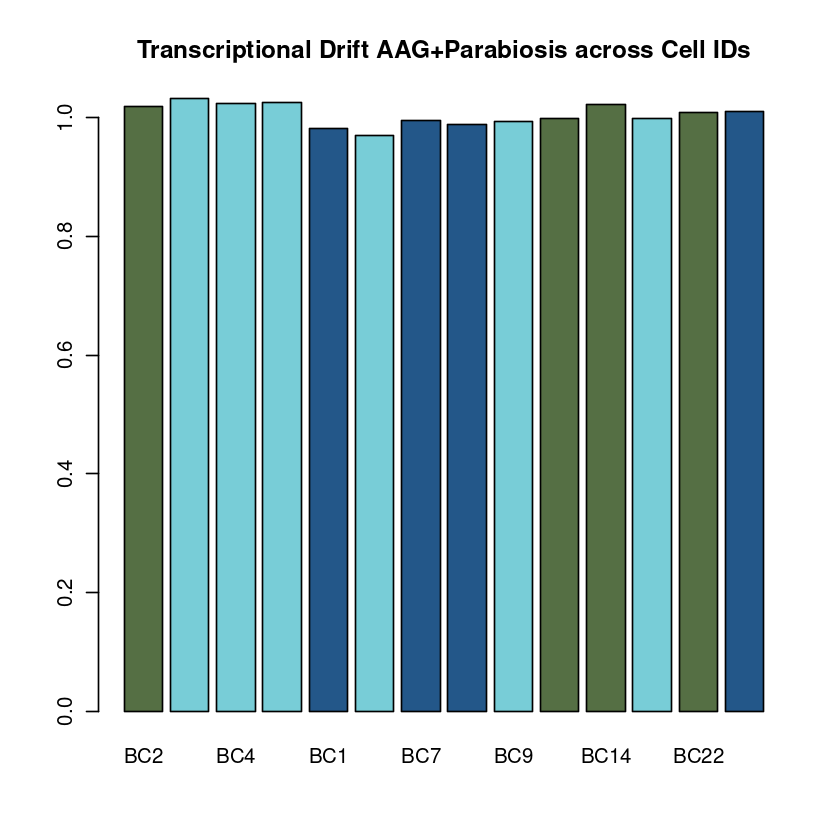

In [18]:
# Find transcriptional drift + compare to young control
driftlist <- c();

idlist <- c('BC2', 'BC3', 
            'BC4', 'BC6', 
            'BC1', 'BC5',
            'BC7', 'BC13',
            'BC11', 'BC9',
            'BC12', 'BC8',
            'BC14', 'BC10',
            'BC23', 'BC22',
            'BC21', 'BC24');

experimentalgroup <- c("young het", "old iso", "old iso", "old iso", "old het", "old iso", "old het", "old het", "young iso", 
                       "old iso", "young iso", "young het", "young het", "old iso", "young iso", "young het", "old het", "young iso");

cols <- c("#556F44", "#78CDD7", "#78CDD7", "#78CDD7", "#235789", "#78CDD7", "#235789", "#235789", "#A7A650", 
                       "#78CDD7", "#A7A650", "#556F44", "#556F44", "#78CDD7", "#A7A650", "#556F44", "#235789", "#A7A650");

cols_no_control <- c("#556F44", "#78CDD7", "#78CDD7", "#78CDD7", "#235789", "#78CDD7", "#235789", "#235789", 
                       "#78CDD7", "#556F44", "#556F44", "#78CDD7", "#556F44", "#235789");

# First calculate for young control
yisoaverage <- 0
for (x in 1:4)
{
    yisoaverage <- yisoaverage + yisodata[[x]]$nCount_SCT %>% mean()
}

yisoaverage <- yisoaverage/4

# Old control vs young control
for (x in 1:6) {
    drift <- (oisodata[[x]]$nCount_SCT %>% mean())/yisoaverage
    driftlist <- c(driftlist, drift)
}

# Old exercise vs young control
for (x in 1:4) {
    drift <- (ohetdata[[x]]$nCount_SCT %>% mean())/yisoaverage
    driftlist <- c(driftlist, drift)
}

# Young exercise vs young control
for (x in 1:4) {
    drift <- (yhetdata[[x]]$nCount_SCT %>% mean())/yisoaverage
    driftlist <- c(driftlist, drift)
}

driftlist

idlist <- c('BC2', 'BC3', 
            'BC4', 'BC6', 
            'BC1', 'BC5',
            'BC7', 'BC13',
            'BC9', 'BC8',
            'BC14','BC10',
            'BC22', 'BC21');


barplot(main="Transcriptional Drift AAG+Parabiosis across Cell IDs",
        height=driftlist,
        names = idlist,
        col = cols_no_control)


In [19]:
png(filename = "figures/transcriptionaldrift_allcells.png", width = 1700, height = 1000, res = 150)

plot <- barplot(main=paste("Transcriptional Drift AAG+Parabiosis across Cell IDs"),
        height=driftlist, 
        ylim = c(0, round(max(drift), 2)),
        names = idlist,
        col = cols_no_control)

dev.off()

png 
  2

In [ ]:
dataNoYControl <- subset(data, subset = AgeCond != "Y_Iso")
head(dataNoYControl)

In [ ]:
dataNoYControl <- SplitObject(dataNoYControl, split.by = "ID")

In [ ]:
# Convert list of Seurat objects into sparse matrices
dataNoYControl_initial_matrices <- lapply(dataNoYControl, function(x) GetAssayData(x, slot = "data"))
yisodata_initial_matrices <- lapply(yisodata, function(x) GetAssayData(x, slot = "data"))


In [ ]:
# Try manually averaging out a row to compare with ycontrolaverages
sum(yisodata_initial_matrices[[1]][1,])/length(yisodata_initial_matrices[[1]][1,])

In [ ]:
# Take average of each gene for each matrix in ycontroldata_initial_matrices
yisoaverages <- lapply(yisodata_initial_matrices, function(matrix) {
apply(matrix, MARGIN = 1, FUN = function(x) mean(x))
})

In [ ]:
# Turn results into dataframe; each row is one organism
yisoaverages <- do.call(rbind, lapply(yisoaverages, unlist))

In [ ]:
# Find the average for each column
yisoaverages <- colMeans(yisoaverages)

In [ ]:
# Turn into list
yisoaverages <- as.list(yisoaverages)

In [ ]:
# ycontrolaverages is a list of the average amount of RNA for each gene for the 4 different young control mice

In [ ]:
# calculate transcriptional drift
result <- lapply(seq_along(dataNoYControl_initial_matrices), function(i) {
  matrix <- dataNoYControl_initial_matrices[[i]]
  avg_value <- yisoaverages[[i]]
  apply(matrix, 1, function(row) calculateTransDrift(row, avg_value))
})

In [ ]:
result

In [ ]:
result_df <- data.frame(
  Matrix = rep(seq_along(result), sapply(result, length)),
  Value = unlist(result)
)

In [ ]:
result_df$log_value <- log(result_df$Value)

In [ ]:
result_df$ID[1:19103] <- 'BC2'
result_df$ID[19104:38206] <- 'BC3'
result_df$ID[38207:57309] <- 'BC4'
result_df$ID[57310:76412] <- 'BC6'
result_df$ID[76413:95515] <- 'BC1'
result_df$ID[95516:114618] <- 'BC5'
result_df$ID[114619:133721] <- 'BC7'

result_df$ID[133722:152824] <- 'BC13'
result_df$ID[152825:171927] <- 'BC9'
result_df$ID[171928:191030] <- 'BC8'
result_df$ID[191031:210133] <- 'BC14'

result_df$ID[210134:229236] <- 'BC10'
result_df$ID[229237:248339] <- 'BC22'
result_df$ID[248340:267442] <- 'BC21'

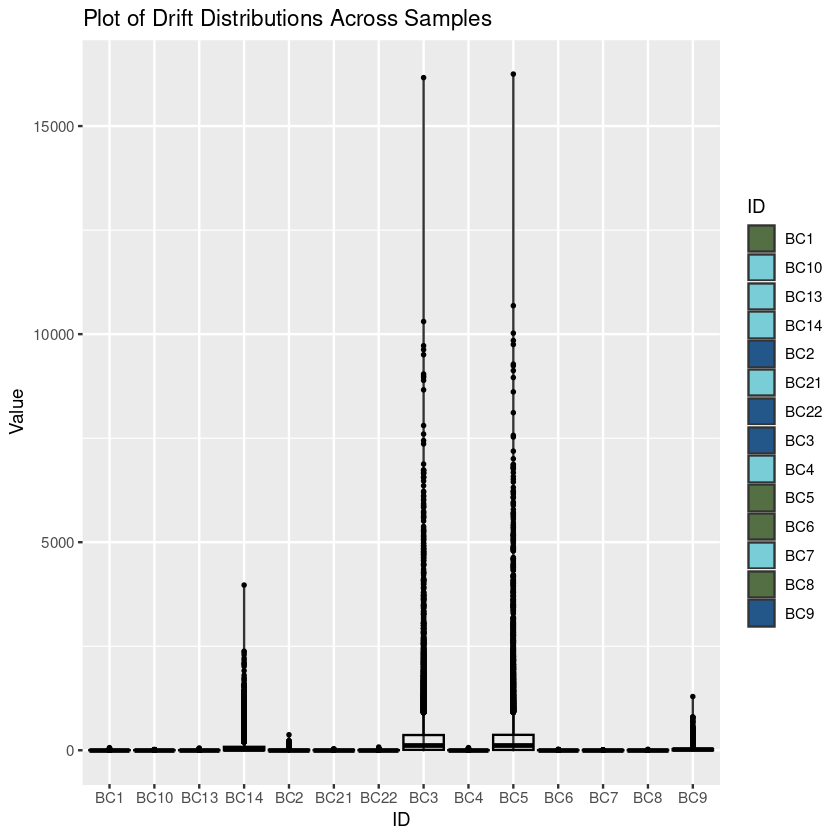

In [104]:
ggplot(result_df, aes(x = ID, y = Value, fill=ID)) +
  geom_violin() +
  geom_boxplot(width = 0.9, color = "black", fill="NA", outlier.size = 0.5, position = position_dodge(0.75)) +
  labs(title = "Plot of Drift Distributions Across Samples",
       x = "ID",
       y = "Value") +
  scale_fill_manual(values = cols_no_control)

Warning message:
“Removed 38610 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 38610 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


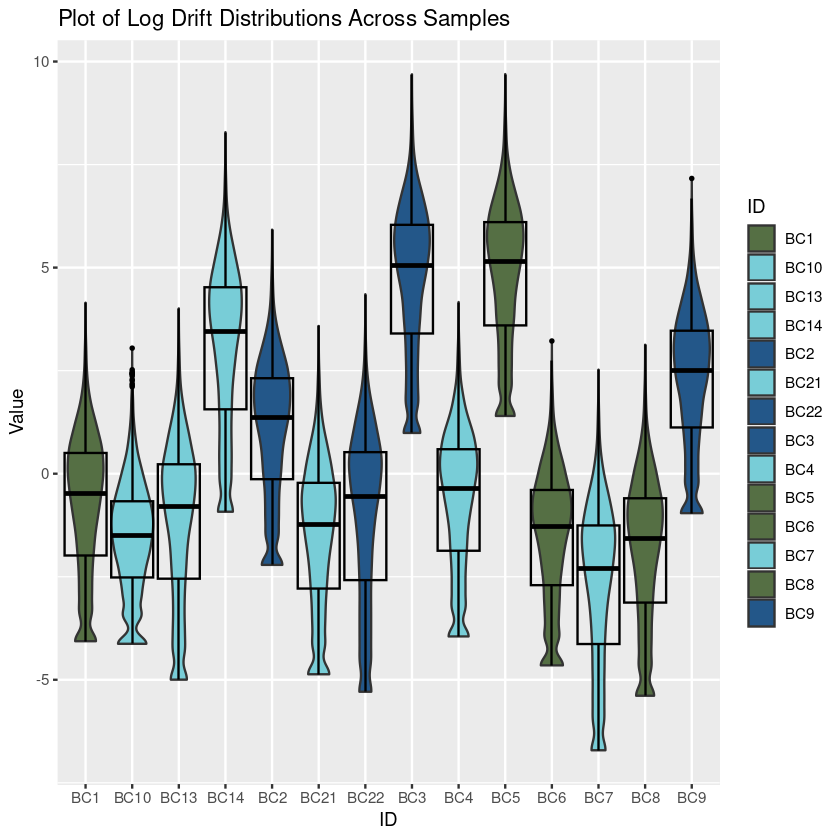

In [105]:
ggplot(result_df, aes(x = ID, y = log_value, fill=ID)) +
  geom_violin() +
  geom_boxplot(width = 0.9, color = "black", fill="NA", outlier.size = 0.5, position = position_dodge(0.75)) +
  labs(title = "Plot of Log Drift Distributions Across Samples",
       x = "ID",
       y = "Value") +
  scale_fill_manual(values = cols_no_control)

In [106]:
result_df_noNA <- na.omit(result_df)
result_df_noNA <- result_df_noNA[!is.infinite(result_df_noNA$log_value),]

In [107]:
# Calculate Drift Variance
# instead of averaging data, do cross validation

driftvariances <- result_df_noNA %>%
  group_by(ID) %>%
  summarise(log_drift_variance = var(log_value), drift_variance = var(Value))



In [108]:
result_df_noNA <- result_df_noNA %>%
  left_join(driftvariances, by = "ID")


In [109]:
sem <- function(data) {
    numpoints <- length(data[[4]])

    data <- data[!is.infinite(data$log_value),]

    std_dev <- sd(data$log_value, na.rm=TRUE)
    
    standard_error <- std_dev / sqrt(numpoints)

    return(standard_error)
}

In [110]:
calcmean <- function(data) {
    data <- data[!is.infinite(data$log_value),]

    mean <- mean(data$log_value, na.rm=TRUE)
    
    return(mean)
}

In [111]:
uniqueIDs <- unique(result_df_noNA$ID)

semvals <- c()
meanvals <- c()

for (id in uniqueIDs) {
    group <- result_df_noNA[result_df_noNA$ID == id, ]

    semvals <- c(semvals, sem(group))
    meanvals <- c(meanvals, calcmean(group))
}


In [112]:
result_df_noNA <- result_df_noNA %>%
  group_by(ID) %>%
  mutate(logsemval = semvals[which(ID == idlist)[[1]]],
         logmeanval = meanvals[which(ID == idlist)[[1]]])

Warning message:
“There were 26 warnings in `mutate()`.
The first warning was:
ℹ In argument: `logsemval = semvals[which(ID == idlist)[[1]]]`.
ℹ In group 1: `ID = "BC1"`.
Caused by warning in `ID == idlist`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 25 remaining warnings.”


In [113]:
head(result_df_noNA)

Matrix,Value,log_value,ID,log_drift_variance,drift_variance,logsemval,logmeanval
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4375229,-0.8266262,BC2,2.848846,228.5846,0.01338133,1.054096
1,6.3947935,1.8554841,BC2,2.848846,228.5846,0.01338133,1.054096
1,14.1844608,2.6521471,BC2,2.848846,228.5846,0.01338133,1.054096
1,6.5174469,1.8744827,BC2,2.848846,228.5846,0.01338133,1.054096
1,30.1030994,3.4046281,BC2,2.848846,228.5846,0.01338133,1.054096
1,4.9037246,1.5899950,BC2,2.848846,228.5846,0.01338133,1.054096


In [114]:
unique(result_df_noNA$ID)

[1] "BC2"  "BC3"  "BC4"  "BC6"  "BC1"  "BC5"  "BC7"  "BC13" "BC9"  "BC8" 
[11] "BC14" "BC10" "BC22" "BC21"

In [115]:
idlist
experimentalgroup

[1] "BC2"  "BC3"  "BC4"  "BC6"  "BC1"  "BC5"  "BC7"  "BC13" "BC9"  "BC8" 
[11] "BC14" "BC10" "BC22" "BC21"

[1] "young het" "old iso"   "old iso"   "old iso"   "old het"   "old iso"  
 [7] "old het"   "old het"   "young iso" "old iso"   "young iso" "young het"
[13] "young het" "old iso"   "young iso" "young het" "old het"   "young iso"

In [116]:
experimentalgroup <- c('young het', 'old iso', 'old iso', 'old iso', 'old het', 'old iso', 'old het', 'old het', 
                       'old iso', 'young het', 'young het', 'old iso', 'young het', 'old het');

experimentalgroupnum <- c(2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1)

In [117]:
driftvariances <- data.frame(driftvariances)

driftvariances <- driftvariances %>%
  mutate(ID=idlist, semval = semvals, meanval = meanvals, experimentalGroup = experimentalgroup, experimentalgroupnum = experimentalgroupnum)

driftvariances

ID,log_drift_variance,drift_variance,semval,meanval,experimentalGroup,experimentalgroupnum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
BC2,2.925729,6.605594e+00,0.01338133,1.0540960,young het,2
BC3,1.872703,6.521748e-01,0.01419752,4.6700777,old iso,0
BC4,3.724997,4.757834e+00,0.01343769,-0.6709285,old iso,0
BC6,3.971140,2.382772e+04,0.01282396,-1.5663973,old iso,0
BC1,2.848846,2.285846e+02,0.01352588,-0.7714017,old het,1
BC5,3.156034,1.959757e+00,0.01368863,4.8039821,old iso,0
BC7,4.346488,7.863021e+00,0.01501206,-2.7313867,old het,1
BC13,3.380726,4.221400e+05,0.01479392,-1.2036118,old het,1
BC9,2.880117,7.500780e+00,0.01325562,2.2405340,old iso,0


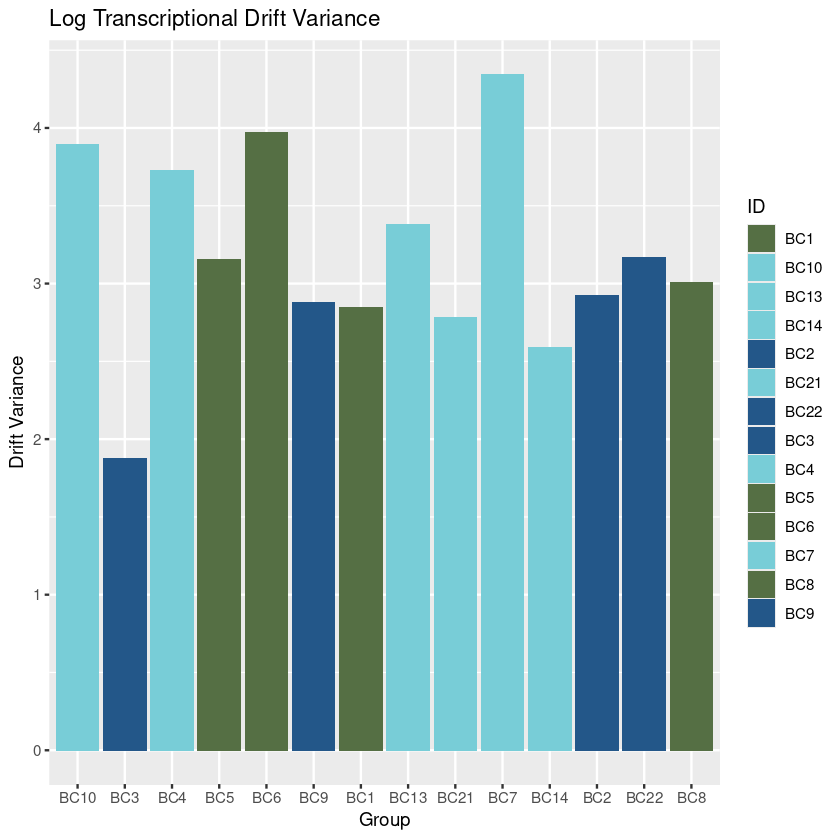

In [119]:
p <- ggplot(driftvariances, aes(x=reorder(ID, experimentalgroupnum), y=log_drift_variance, fill = ID)) + 
    geom_col(aes(fill = ID)) +
    ggtitle("Log Transcriptional Drift Variance") +
    labs(y = "Drift Variance", x = "Group") +
    scale_fill_manual(values = cols_no_control)
p

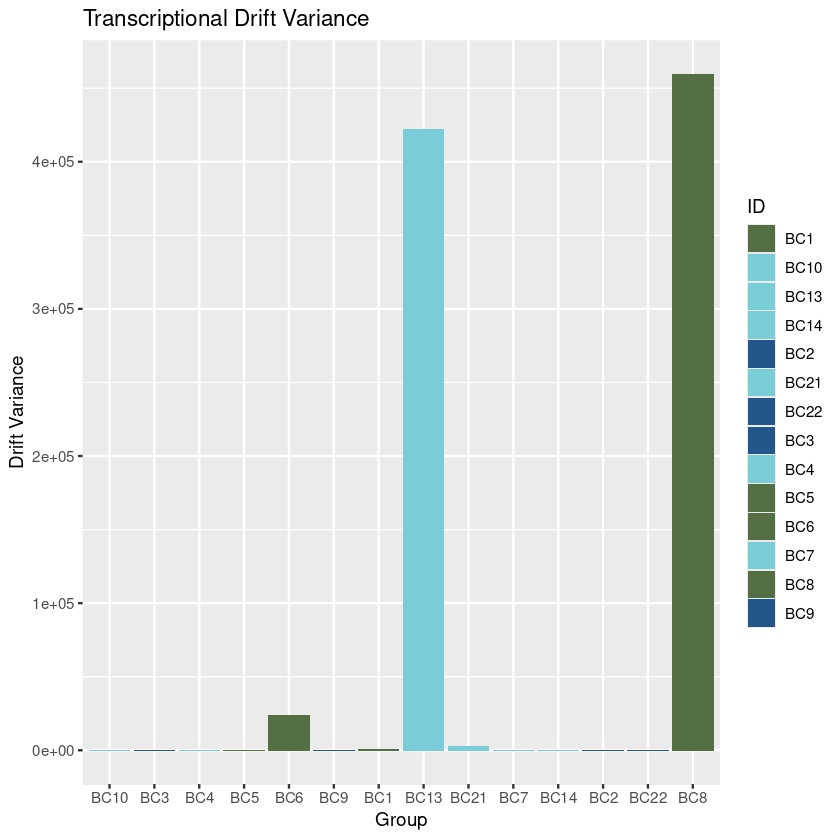

In [120]:
p <- ggplot(driftvariances, aes(x=reorder(ID, experimentalgroupnum), y=drift_variance, fill = ID)) + 
    geom_col(aes(fill = ID)) +
    ggtitle("Transcriptional Drift Variance") +
    labs(y = "Drift Variance", x = "Group") +
    scale_fill_manual(values = cols_no_control)
p

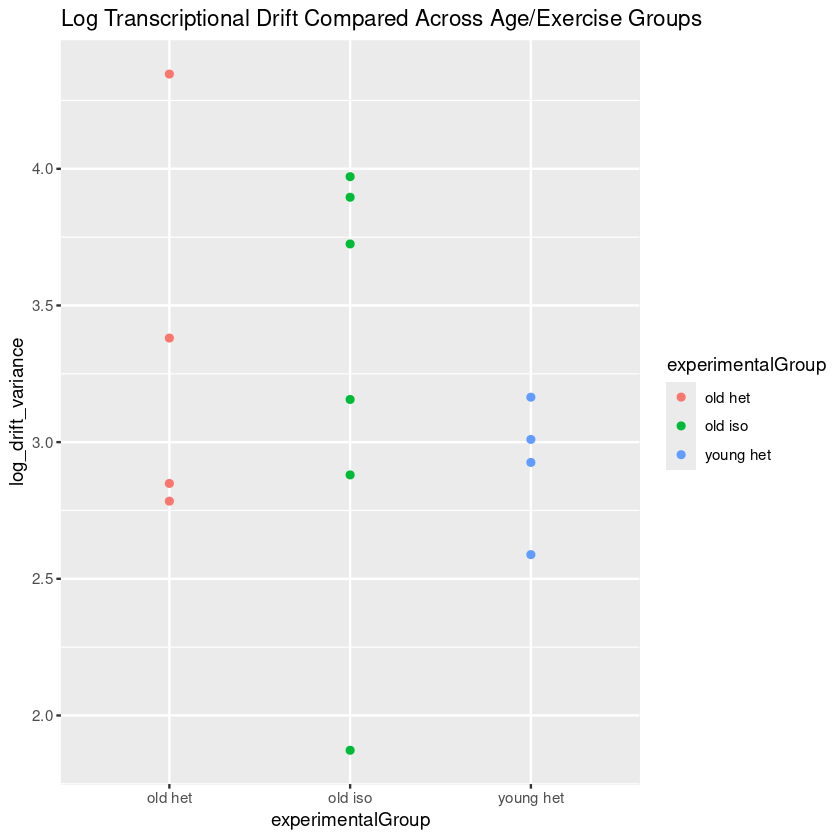

In [121]:
ggplot(driftvariances) +
    geom_point(aes(x = experimentalGroup, y = log_drift_variance, color = experimentalGroup)) +
    labs(title = "Log Transcriptional Drift Compared Across Age/Exercise Groups")

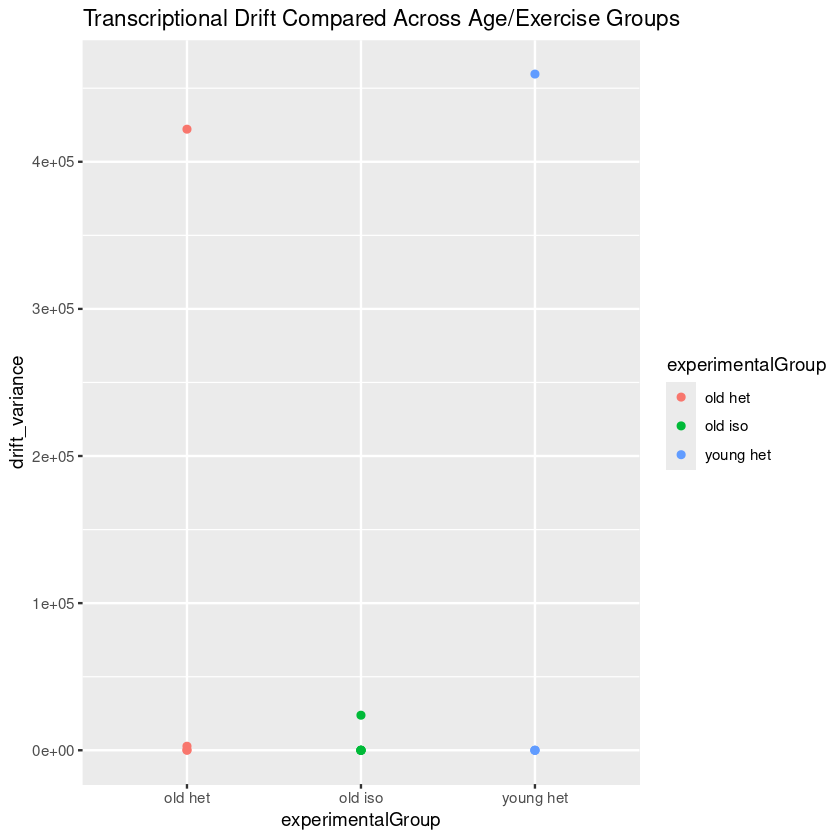

In [122]:
ggplot(driftvariances) +
    geom_point(aes(x = experimentalGroup, y = drift_variance, color = experimentalGroup)) +
    labs(title = "Transcriptional Drift Compared Across Age/Exercise Groups")

In [123]:
# Cell type specific trans. drift. var.

In [125]:
celltypes <- unique(origdata$Celltype)

In [ ]:
idlist <- c('BC2', 'BC3', 
            'BC4', 'BC6', 
            'BC1', 'BC5',
            'BC7', 'BC13',
            'BC11', 'BC9',
            'BC12', 'BC8',
            'BC14', 'BC10',
            'BC23', 'BC22',
            'BC21', 'BC24');

experimentalgroup <- c("young het", "old iso", "old iso", "old iso", "old het", "old iso", "old het", "old het", "young iso", 
                       "old iso", "young iso", "young het", "young het", "old iso", "young iso", "young het", "old het", "young iso");

cols <- c("#556F44", "#78CDD7", "#78CDD7", "#78CDD7", "#235789", "#78CDD7", "#235789", "#235789", "#A7A650", 
                       "#78CDD7", "#A7A650", "#556F44", "#556F44", "#78CDD7", "#A7A650", "#556F44", "#235789", "#A7A650");

cols_no_control <- c("#556F44", "#78CDD7", "#78CDD7", "#78CDD7", "#235789", "#78CDD7", "#235789", "#235789", 
                       "#78CDD7", "#556F44", "#556F44", "#78CDD7", "#556F44", "#235789");


In [ ]:
idToGroup <- c(
    'BC2' = "Y_Het", 
    'BC3' = "O_Iso", 
    'BC4' = "O_Iso", 
    'BC6' = "O_Iso", 
    'BC1' = "O_Het", 
    'BC5' = "O_Iso",
    'BC7' = "O_Het", 
    'BC13' = "O_Het",
    'BC11' = "Y_Iso", 
    'BC9' = "O_Iso",
    'BC12' = "Y_Iso", 
    'BC8' = "Y_Het",
    'BC14' = "Y_Het", 
    'BC10' = "O_Iso",
    'BC23', = "Y_Iso" 
    'BC22' = "Y_Het",
    'BC21', = "O_Het", 
    'BC24' = "Y_Iso");

In [ ]:
idToNum <- c(
    'BC2' = "3", 
    'BC3' = "0", 
    'BC4' = "0", 
    'BC6' = "0", 
    'BC1' = "1", 
    'BC5' = "0",
    'BC7' = "1", 
    'BC13' = "1",
    'BC11' = "2", 
    'BC9' = "0",
    'BC12' = "2", 
    'BC8' = "3",
    'BC14' = "3", 
    'BC10' = "0",
    'BC23', = "2" 
    'BC22' = "3",
    'BC21', = "1", 
    'BC24' = "2");

In [ ]:
idToColor <- c(
    'BC2' = "#556F44", 
    'BC3' = "#78CDD7", 
    'BC4' = "#78CDD7", 
    'BC6' = "#78CDD7", 
    'BC1' = "#235789", 
    'BC5' = "#78CDD7",
    'BC7' = "#235789", 
    'BC13' = "#235789",
    'BC11' = "#A7A650", 
    'BC9' = "#78CDD7",
    'BC12' = "#A7A650", 
    'BC8' = "#556F44",
    'BC14' = "#556F44", 
    'BC10' = "#78CDD7",
    'BC23', = "#A7A650" 
    'BC22' = "#556F44",
    'BC21', = "#235789", 
    'BC24' = "#A7A650");

In [ ]:
for (celltype in celltypes) {
    prefix = celltype
    
    data <- subset(origdata, subset = Celltype.LowRes == celltype)

    # Split off Young Exercise data
    ycontroldata <- subset(data, subset = AgeCond == "Y_Control")
    
    ycontroldata <- SplitObject(ycontroldata, split.by = "ID")
    
    # Create dataset w no young control data
    dataNoYControl <- subset(data, subset = AgeCond != "Y_Control")
 
    availIDs <- unique(dataNoYControl$ID)
    
    dataNoYControl <- SplitObject(dataNoYControl, split.by = "ID")
    
    # Convert list of Seurat objects into sparse matrices
    dataNoYControl_initial_matrices <- lapply(dataNoYControl, function(x) GetAssayData(x, slot = "data"))
    ycontroldata_initial_matrices <- lapply(ycontroldata, function(x) GetAssayData(x, slot = "data"))
    
    # Take average of each gene for each matrix in ycontroldata_initial_matrices
    ycontrolaverages <- lapply(ycontroldata_initial_matrices, function(matrix) {
    apply(matrix, MARGIN = 1, FUN = function(x) mean(x))
    })
    
    # Turn results into dataframe; each row is one organism
    ycontrolaverages <- do.call(rbind, lapply(ycontrolaverages, unlist))
    
    # Find the average for each column
    ycontrolaverages <- colMeans(ycontrolaverages)
    
    # Turn into list
    ycontrolaverages <- as.list(ycontrolaverages)
    
    # calculate transcriptional drift
    result <- lapply(seq_along(dataNoYControl_initial_matrices), function(i) {
      matrix <- dataNoYControl_initial_matrices[[i]]
      avg_value <- ycontrolaverages[[i]]
      apply(matrix, 1, function(row) calculateTransDrift(row, avg_value))
    })
    
    result_df <- data.frame(
      Matrix = rep(seq_along(result), sapply(result, length)),
      Value = unlist(result)
    )
    
    result_df$log_value <- log(result_df$Value)
    
    left <- 1
    right <- 17671

    colorbygroup <- c();
    
    for (i in 1:length(availIDs))
    {
        result_df$ID[left:right] <- availIDs[i]
        left <- right + 1
        right <- right + 17671

        colorbygroup = c(colorbygroup, idToColor[availIDs[i]])
    }

    print(colorbygroup)
    
    violin <- ggplot(result_df, aes(x = ID, y = log_value, fill=ID)) +
      geom_violin() +
      geom_boxplot(width = 0.9, color = "black", fill="NA", outlier.size = 0.5, position = position_dodge(0.75)) +
      labs(title = paste("Plot of Log Drift Distributions Across Samples in", celltype),
           x = "ID",
           y = "Log Value") +
      scale_fill_manual(values = colorbygroup)
    
    ggsave(paste(prefix, "DriftDistribution.png"), violin, width = 10, height = 10)

        
    result_df_noNA <- na.omit(result_df)
    result_df_noNA <- result_df_noNA[!is.infinite(result_df_noNA$log_value),]
    
    # Calculate Drift Variance
    # try cross validation later
    
    driftvariances <- result_df_noNA %>%
      group_by(ID) %>%
      summarise(log_drift_variance = var(log_value), drift_variance = var(Value))
    
    result_df_noNA <- result_df_noNA %>%
      left_join(driftvariances, by = "ID")   
    
    idlist <- unique(result_df_noNA$ID);
    
    experimentalgroup <- c();
    experimentalgroupnum <- c();
    for (id in idlist)
    {
        experimentalgroup = c(experimentalgroup, idToGroup[id])
        experimentalgroupnum = c(experimentalgroupnum, idToNum[id])
    }

    driftvariances <- driftvariances %>%
        mutate(ID=idlist, experimentalGroup = experimentalgroup, experimentalgroupnum = experimentalgroupnum)

    driftvariances <- data.frame(driftvariances)
    
    logpl <- ggplot(driftvariances, aes(x=reorder(ID, experimentalgroupnum), y=log_drift_variance, fill = ID)) + 
        geom_col(aes(fill = ID)) +
        ggtitle(paste("Log Transcriptional Drift Variance in", celltype)) +
        labs(y = "Drift Variance", x = "Group") +
        scale_fill_manual(values = colorbygroup)
    ggsave(paste(prefix, "LogDriftVariance.png"), logpl, width = 10, height = 10)
    
    pl <- ggplot(driftvariances, aes(x=reorder(ID, experimentalgroupnum), y=drift_variance, fill = ID)) + 
        geom_col(aes(fill = ID)) +
        ggtitle(paste("Transcriptional Drift Variance in", celltype)) +
        labs(y = "Drift Variance", x = "Group") +
        scale_fill_manual(values = colorbygroup)
    ggsave(paste(prefix, "DriftVariance.png"), pl, width = 10, height = 10)
    
    logdot <- ggplot(driftvariances) +
        geom_point(aes(x = experimentalGroup, y = log_drift_variance, color = experimentalGroup)) +
        labs(title = paste("Log Transcriptional Drift Compared Across Age/Exercise Groups in", celltype))
    
    ggsave(paste(prefix, "LogDriftVarianceDot.png"), logdot, width = 10, height = 10)
    
    dot <- ggplot(driftvariances) +
        geom_point(aes(x = experimentalGroup, y = drift_variance, color = experimentalGroup)) +
        labs(title = paste("Transcriptional Drift Compared Across Age/Exercise Groups in", celltype))

    ggsave(paste(prefix, "DriftVarianceDot.png"), dot, width = 10, height = 10)

}

In [ ]:
for (celltype in celltypes) {
    data <- subset(origdata, subset = Celltype.LowRes == celltype)

    for (youngcontrolID in unique(subset(data, subset = AgeCond == "Y_Control")$ID))
    {
        prefix = paste(celltype, youngcontrolID)
        
        # Split off young control data
        ycontroldata <- subset(data, subset = ID == youngcontrolID)
        
        ycontroldata <- SplitObject(ycontroldata, split.by = "ID")
        
        # Create dataset w no young control data
        dataNoYControl <- subset(data, subset = AgeCond != "Y_Control")
    
        availIDs <- unique(dataNoYControl$ID)
        
        dataNoYControl <- SplitObject(dataNoYControl, split.by = "ID")
        
        # Convert list of Seurat objects into sparse matrices
        dataNoYControl_initial_matrices <- lapply(dataNoYControl, function(x) GetAssayData(x, slot = "data"))
        ycontroldata_initial_matrices <- lapply(ycontroldata, function(x) GetAssayData(x, slot = "data"))
        
        # Take average of each gene for each matrix in ycontroldata_initial_matrices
        ycontrolaverages <- lapply(ycontroldata_initial_matrices, function(matrix) {
        apply(matrix, MARGIN = 1, FUN = function(x) mean(x))
        })
        
        # Turn results into dataframe; each row is one organism
        ycontrolaverages <- do.call(rbind, lapply(ycontrolaverages, unlist))
        
        # Find the average for each column
        ycontrolaverages <- colMeans(ycontrolaverages)
        
        # Turn into list
        ycontrolaverages <- as.list(ycontrolaverages)
        
        # calculate transcriptional drift
        result <- lapply(seq_along(dataNoYControl_initial_matrices), function(i) {
          matrix <- dataNoYControl_initial_matrices[[i]]
          avg_value <- ycontrolaverages[[i]]
          apply(matrix, 1, function(row) calculateTransDrift(row, avg_value))
        })
        
        result_df <- data.frame(
          Matrix = rep(seq_along(result), sapply(result, length)),
          Value = unlist(result)
        )
        
        result_df$log_value <- log(result_df$Value)
        
        left <- 1
        right <- 17671

        colorbygroup <- c();
            
        for (i in 1:length(availIDs))
        {
            result_df$ID[left:right] <- availIDs[i]
            left <- right + 1
            right <- right + 17671

            colorbygroup = c(colorbygroup, idToColor[availIDs[i]])
        }
    
        
        violin <- ggplot(result_df, aes(x = ID, y = log_value, fill=ID)) +
          geom_violin() +
          geom_boxplot(width = 0.9, color = "black", fill="NA", outlier.size = 0.5, position = position_dodge(0.75)) +
          labs(title = paste("Plot of Log Drift Distributions Across Samples in", celltype),
               x = "ID",
               y = "Log Value") +
          scale_fill_manual(values = colorbygroup)
        
        ggsave(paste(prefix, "DriftDistribution.png"), violin, width = 10, height = 10)
    
            
        result_df_noNA <- na.omit(result_df)
        result_df_noNA <- result_df_noNA[!is.infinite(result_df_noNA$log_value),]
        
        # Calculate Drift Variance
        # try cross validation later
        
        driftvariances <- result_df_noNA %>%
          group_by(ID) %>%
          summarise(log_drift_variance = var(log_value), drift_variance = var(Value))
        
        result_df_noNA <- result_df_noNA %>%
          left_join(driftvariances, by = "ID")   
        
        idlist <- unique(result_df_noNA$ID);
        
        experimentalgroup <- c();
        experimentalgroupnum <- c();
        for (id in idlist)
        {
            experimentalgroup = c(experimentalgroup, idToGroup[id])
            experimentalgroupnum = c(experimentalgroupnum, idToNum[id])
        }
    
        driftvariances <- driftvariances %>%
            mutate(ID=idlist, experimentalGroup = experimentalgroup, experimentalgroupnum = experimentalgroupnum)
    
        driftvariances <- data.frame(driftvariances)
        
        logpl <- ggplot(driftvariances, aes(x=reorder(ID, experimentalgroupnum), y=log_drift_variance, fill = ID)) + 
            geom_col(aes(fill = ID)) +
            ggtitle(paste("Log Transcriptional Drift Variance in", celltype)) +
            labs(y = "Drift Variance", x = "Group") +
            scale_fill_manual(values = colorbygroup)
        ggsave(paste(prefix, "LogDriftVariance.png"), logpl, width = 10, height = 10)
        
        pl <- ggplot(driftvariances, aes(x=reorder(ID, experimentalgroupnum), y=drift_variance, fill = ID)) + 
            geom_col(aes(fill = ID)) +
            ggtitle(paste("Transcriptional Drift Variance in", celltype)) +
            labs(y = "Drift Variance", x = "Group") +
            scale_fill_manual(values = colorbygroup)
        ggsave(paste(prefix, "DriftVariance.png"), pl, width = 10, height = 10)
        
        logdot <- ggplot(driftvariances) +
            geom_point(aes(x = experimentalGroup, y = log_drift_variance, color = experimentalGroup)) +
            labs(title = paste("Log Transcriptional Drift Compared Across Age/Exercise Groups in", celltype))
        
        ggsave(paste(prefix, "LogDriftVarianceDot.png"), logdot, width = 10, height = 10)
        
        dot <- ggplot(driftvariances) +
            geom_point(aes(x = experimentalGroup, y = drift_variance, color = experimentalGroup)) +
            labs(title = paste("Transcriptional Drift Compared Across Age/Exercise Groups in", celltype))
    
        ggsave(paste(prefix, "DriftVarianceDot.png"), dot, width = 10, height = 10)
    }
}